# Setup

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from tqdm.notebook import tqdm

In [2]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


In [0]:
classes = ('airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
2


# Data Visualisation

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [8]:
npimg = np.transpose(npimg, (1,2,0))
print(npimg.shape)

(32, 32, 3)


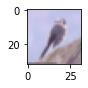

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg)
    plt.show()

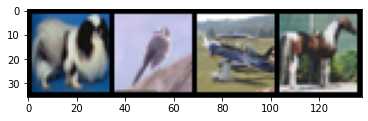

dog bird airplane horse


In [11]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[i]] for i in range(4)))

# Single Conv2d Layer

In [0]:
import torch.nn as nn

class torch_cnn(nn.Module):
    def __init__(self):
        super(torch_cnn, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2))

    def forward(self, x):
        x = self.conv1(x)
        return x

In [13]:
net = torch_cnn()
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [14]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [15]:
out1 = out[1,1,:,:].detach().numpy()
print(out1.shape)

(16, 16)


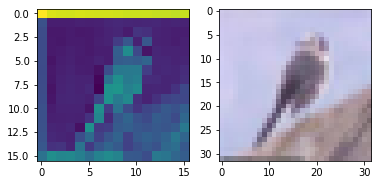

In [16]:
plt.subplot(1,2,1)
plt.imshow(out1)
plt.subplot(1,2,2)
plt.imshow(npimg)
plt.show()

# Deep Convolution Network

In [0]:
class torch_cnn_v1(nn.Module):
    def __init__(self):
        super(torch_cnn_v1, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3,6,5),   #(N,3,32,32) -> (N,6,28,28)
            nn.AvgPool2d(2,2),  #(N,6,32,32) -> (N,6,14,14)
            nn.Conv2d(6,16,5),  #(N,16,14,14) -> (N,16,10,10)
            nn.AvgPool2d(2,2)   #(N,16,10,10) -> (N,16,5,5)
        )
    
    def forward(self, x):
        x = self.model(x)
        return x

In [18]:
net = torch_cnn_v1()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

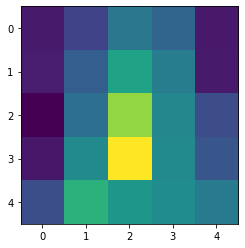

In [19]:
plt.imshow(out[1,1,:,:].detach().numpy())
plt.show()

# LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.Tanh(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.MaxPool2d(2,2)    
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [21]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [22]:
print(out)
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([[-1.7878e-01,  2.0307e-02,  1.6912e-02, -5.9864e-02,  2.9723e-03,
         -8.3114e-02, -5.2854e-02, -2.9694e-02,  1.3673e-01,  4.3620e-02],
        [-1.7396e-01,  2.9526e-02,  7.1415e-03, -9.8994e-02,  5.3681e-04,
         -7.5981e-02, -7.5352e-02, -3.7439e-02,  1.4189e-01,  5.1510e-02],
        [-1.6874e-01,  2.5806e-02,  1.2846e-02, -7.9990e-02, -7.8641e-06,
         -7.6960e-02, -8.3315e-02, -2.4770e-02,  1.2598e-01,  3.8678e-02],
        [-1.6417e-01,  3.2013e-02,  5.6040e-03, -5.4880e-02,  1.3503e-02,
         -6.5622e-02, -6.4228e-02, -1.8101e-02,  1.3074e-01,  3.6247e-02]],
       grad_fn=<AddmmBackward>)
tensor([8, 8, 8, 8])


# Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.Tanh(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.MaxPool2d(2,2)    
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [24]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', download=True, train=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', download=True, train=False, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100*correct/total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 45.41, Train acc: 45.57
Epoch: 1/16, Test acc: 51.17, Train acc: 52.52
Epoch: 2/16, Test acc: 51.51, Train acc: 53.37
Epoch: 3/16, Test acc: 55.16, Train acc: 57.49
Epoch: 4/16, Test acc: 56.98, Train acc: 60.31
Epoch: 5/16, Test acc: 58.76, Train acc: 61.31
Epoch: 6/16, Test acc: 58.34, Train acc: 62.06
Epoch: 7/16, Test acc: 59.76, Train acc: 64.29
Epoch: 8/16, Test acc: 61.50, Train acc: 66.66
Epoch: 9/16, Test acc: 61.66, Train acc: 67.28
Epoch: 10/16, Test acc: 62.10, Train acc: 68.46
Epoch: 11/16, Test acc: 62.49, Train acc: 69.08
Epoch: 12/16, Test acc: 62.25, Train acc: 70.35
Epoch: 13/16, Test acc: 61.14, Train acc: 69.52
Epoch: 14/16, Test acc: 62.66, Train acc: 72.00
Epoch: 15/16, Test acc: 63.32, Train acc: 73.79



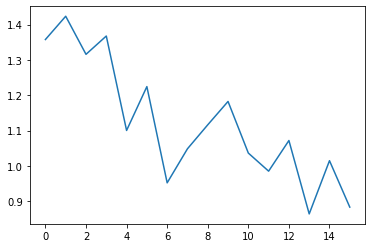

CPU times: user 9min 28s, sys: 8.2 s, total: 9min 36s
Wall time: 9min 38s


In [28]:
%%time
loss_arr = []
loss_epoch_arr = []
epochs = 16

for epoch in tqdm(range(epochs), total=epochs, unit='epoch'):
    for i, data in enumerate(trainloader,0):
        
        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, epochs, evaluation(testloader), evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

# GPU Execution

In [29]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100*correct/total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16



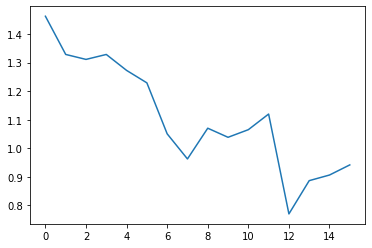

CPU times: user 2min 13s, sys: 857 ms, total: 2min 14s
Wall time: 2min 14s


In [32]:
%%time
loss_arr = []
loss_epoch_arr = []
epochs = 16

for epoch in tqdm(range(epochs), total=epochs, unit='epoch'):
    for i, data in enumerate(trainloader,0):
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d' % (epoch, epochs))

plt.plot(loss_epoch_arr)
plt.show()

In [33]:
print('Test Acc: {}, Train Acc: {}'.format(evaluation(testloader), evaluation(trainloader)))

Test Acc: 62.93, Train Acc: 73.772


# More Visualisation

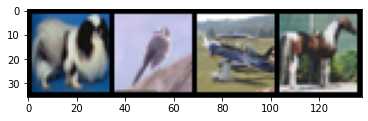

In [34]:
plt.imshow(torchvision.utils.make_grid(images))
plt.show()

In [35]:
net = net.to('cpu')
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [36]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

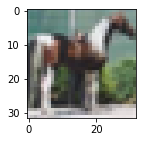

In [37]:
image_id = 3
plt.figure(figsize=(2,2))
imshow(images[image_id])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


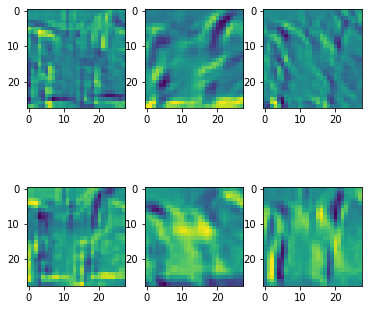

In [38]:
plt.figure(figsize=(6,6))
plt.subplot(231)
for i in range(6):
    ax1 = plt.subplot(2,3,i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap='viridis')
plt.show()